In [2]:
!pip install wordcloud
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
data=pd.read_csv("ds_salaries.csv")

In [4]:
print(data.shape)

(3755, 11)


In [5]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [7]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
data.duplicated().sum()

1171

In [9]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [10]:
numerical_columns=data.select_dtypes(include=['int64']).columns
categorical_columns=data.select_dtypes(include=['object']).columns

In [11]:
numerical_columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [12]:
categorical_columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [13]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [14]:
iso_forest=IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(data[numerical_columns])
outlier_count = (outliers == -1).sum()
total_count = len(outliers)
outlier_percentage = (outlier_count / total_count) * 100
print(f"Percentage of numerical outliers: {outlier_percentage:.2f}%")

Percentage of numerical outliers: 5.01%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [15]:
cat_outliers = {}
cat_outlier_count = 0

for col in categorical_columns:
    value_counts = data[col].value_counts()
    rare_categories = value_counts[value_counts < 0.05 * len(data)]
    cat_outliers[col] = rare_categories.index.tolist()
    cat_outlier_count += data[col].isin(rare_categories.index).sum()

total_count = len(data)

categorical_outlier_percentage = (cat_outlier_count / total_count) * 100

print(f"Categorical outliers count: {cat_outlier_count}")
print(f"Categorical outliers percentage: {categorical_outlier_percentage:.2f}%")

Categorical outliers count: 3034
Categorical outliers percentage: 80.80%


In [16]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

data['job_category'] = data['job_title'].apply(assign_broader_category)


In [17]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Other
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Machine Learning
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Machine Learning
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Science
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Science


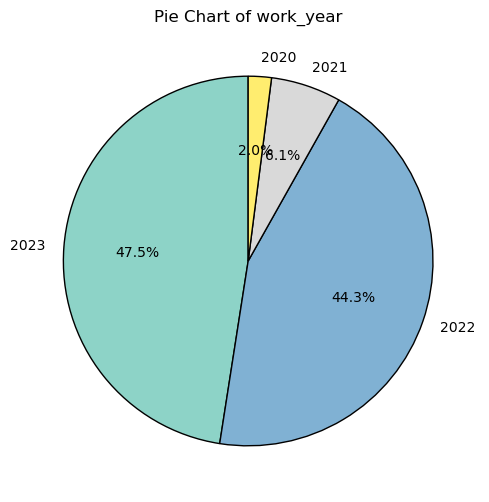

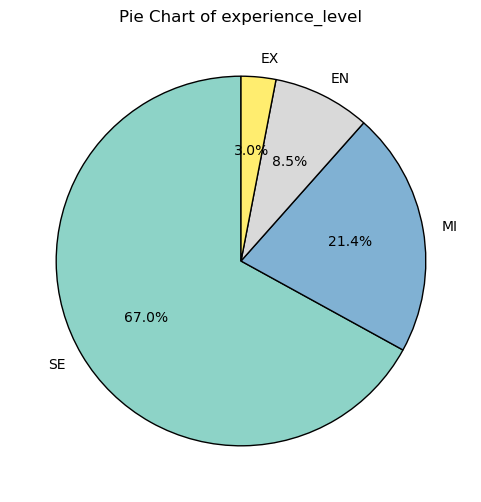

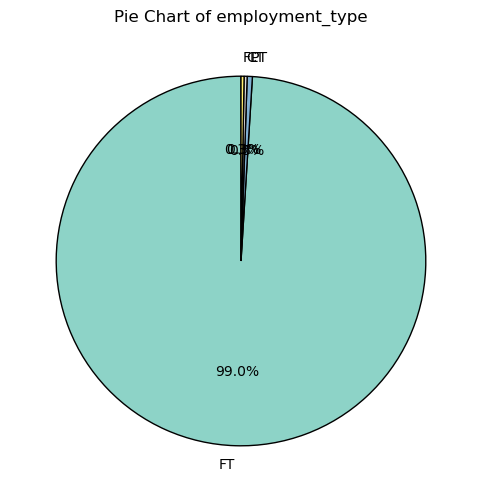

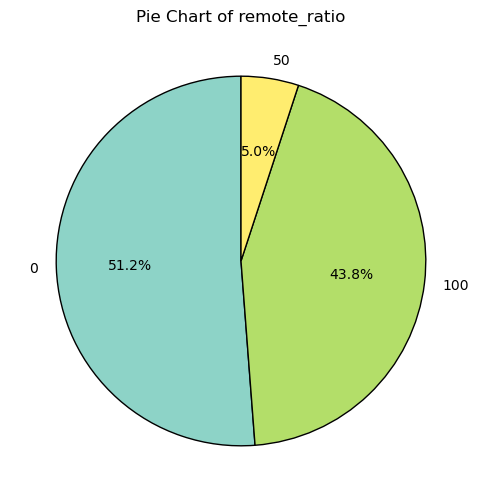

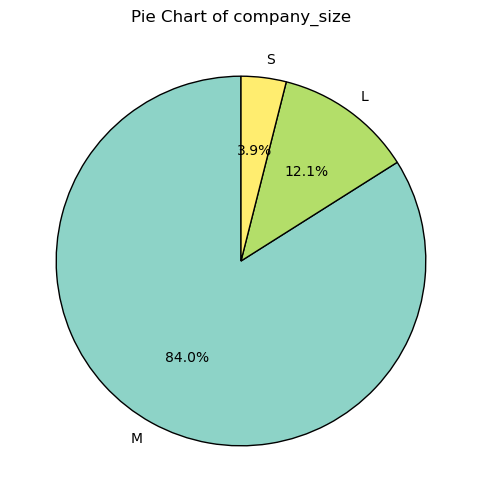

In [18]:
for col in ['work_year','experience_level','employment_type','remote_ratio','company_size']:
    plt.figure(figsize=(6, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', wedgeprops={'edgecolor': 'black'})
    plt.title(f"Pie Chart of {col}")
    plt.ylabel('')  # Remove the y-label for clarity
    plt.show()

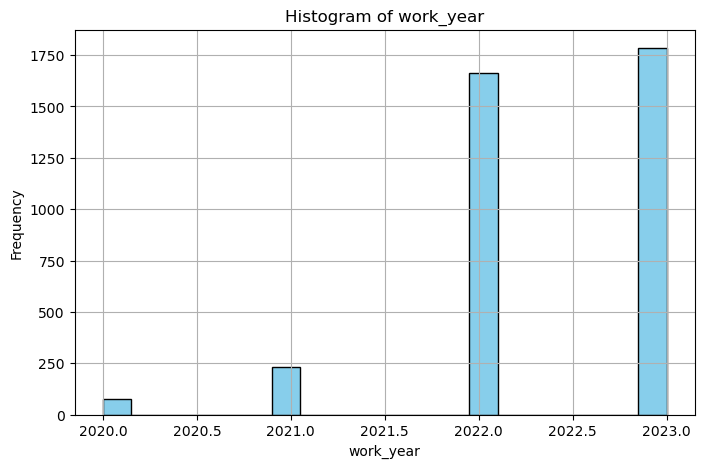

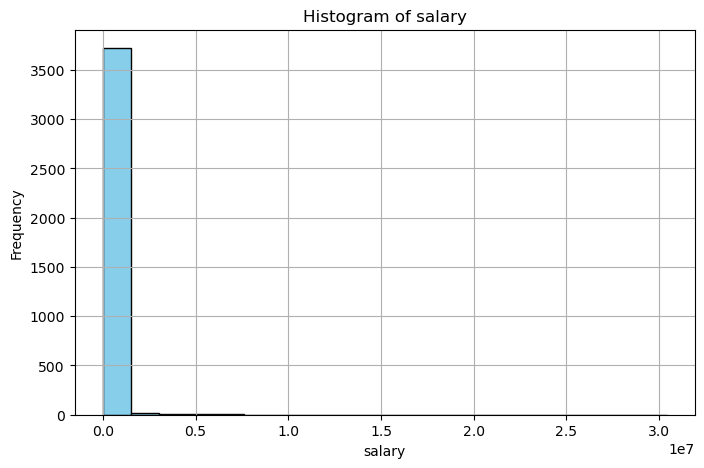

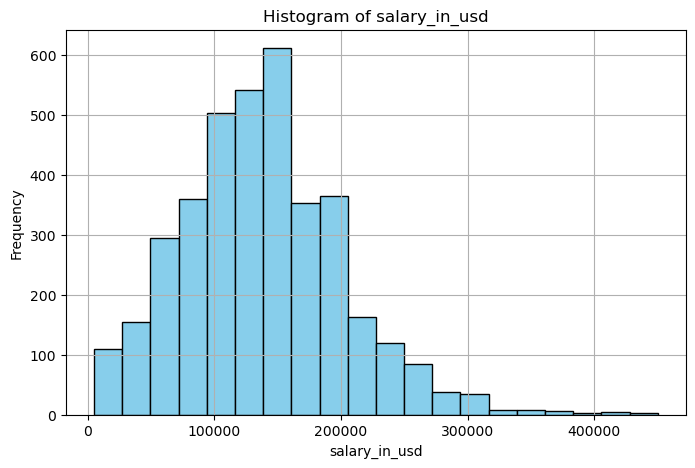

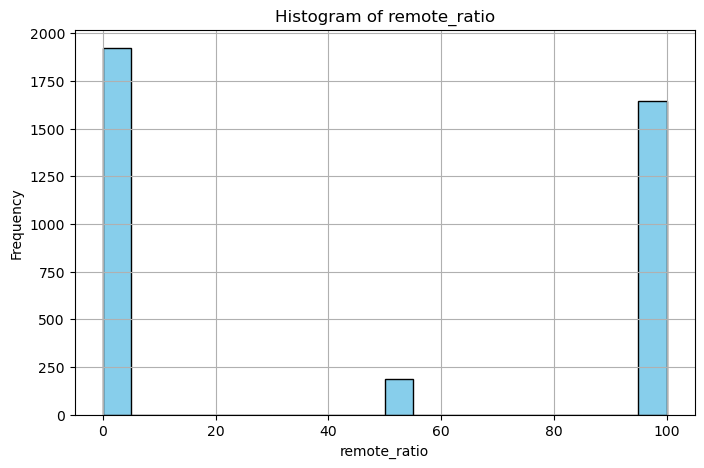

In [19]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

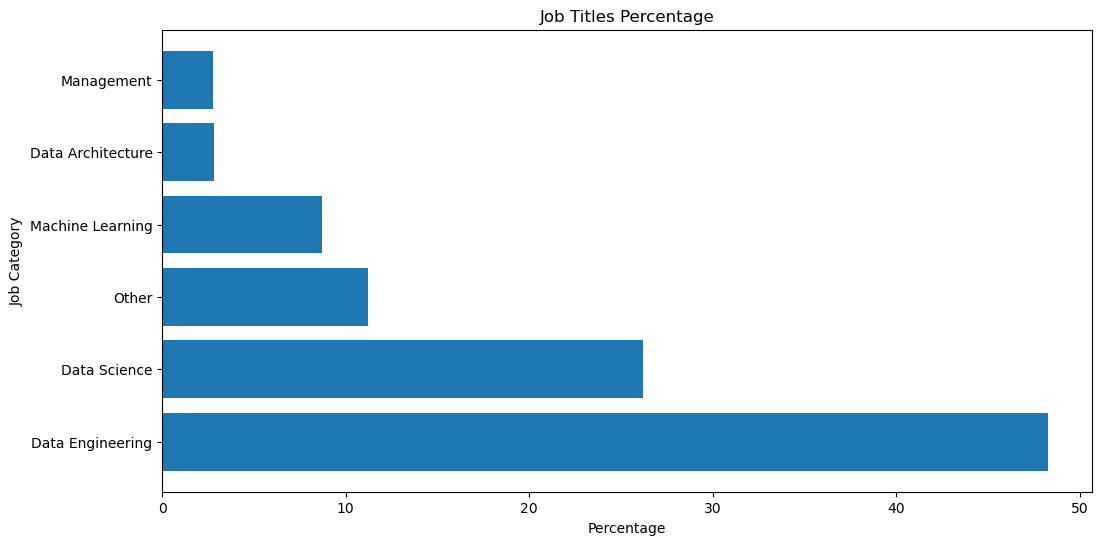

In [20]:
value_counts = data['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

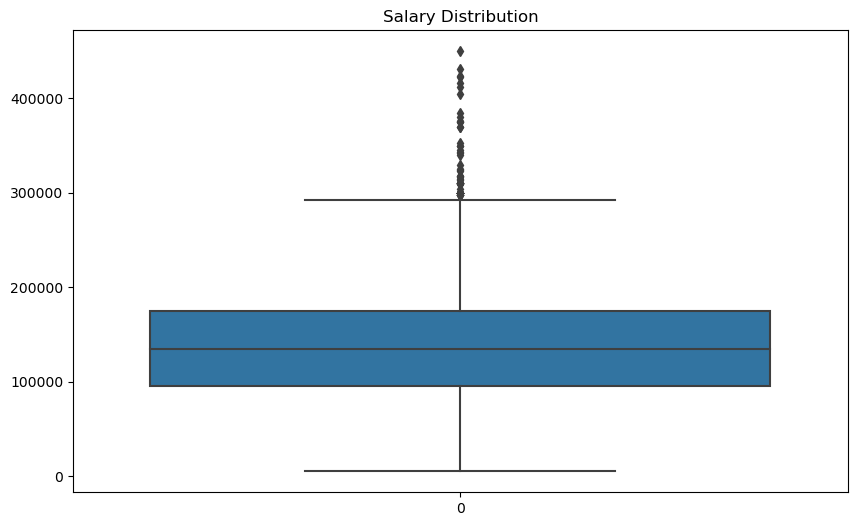

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['salary_in_usd'])
plt.title('Salary Distribution')
plt.show()

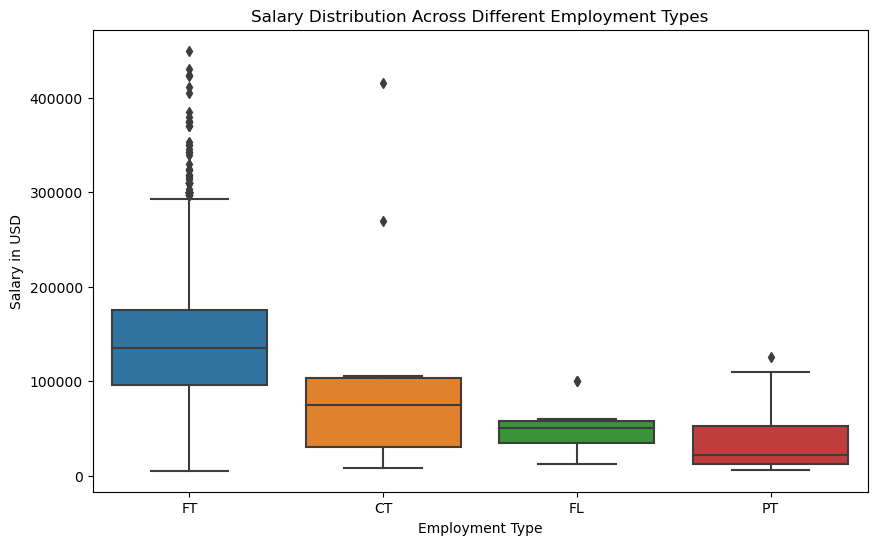

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

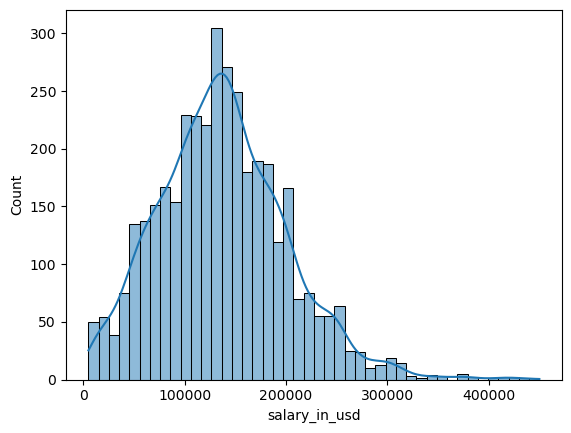

In [23]:
sns.histplot(data['salary_in_usd'], kde=True)

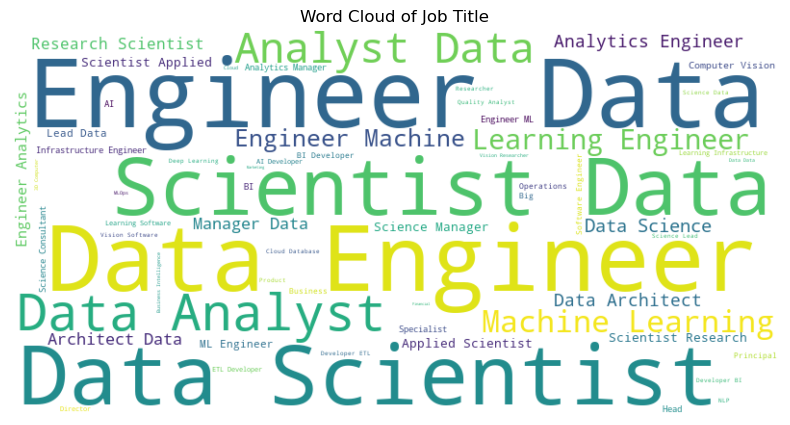

In [24]:
text_data = ' '.join(data['job_title'].dropna())  
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Job Title')
plt.show()

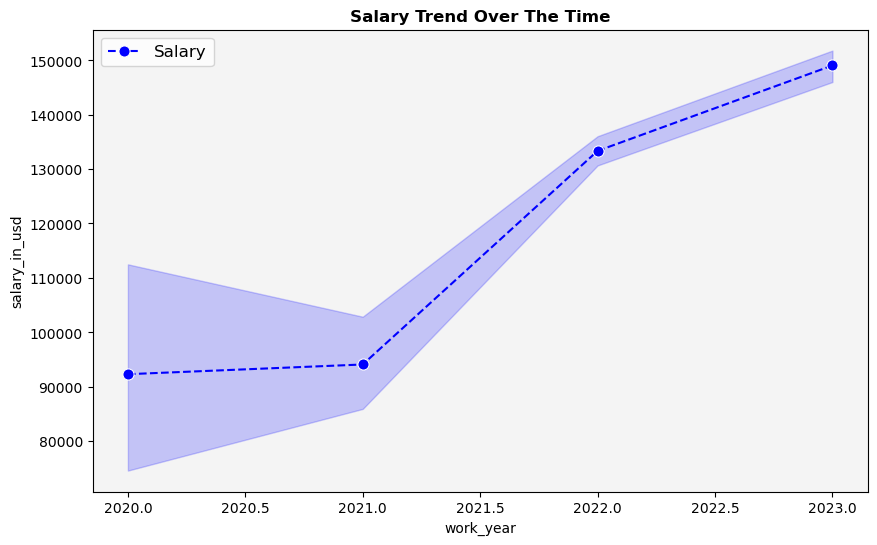

In [25]:
plt.figure(figsize = (10,6))
salary_trend = data[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Salary Trend Over The Time', fontsize=12, fontweight='bold')

p.set_facecolor("#f4f4f4")
plt.legend(['Salary'], loc='best', fontsize=12)

p.grid(False)
plt.show()

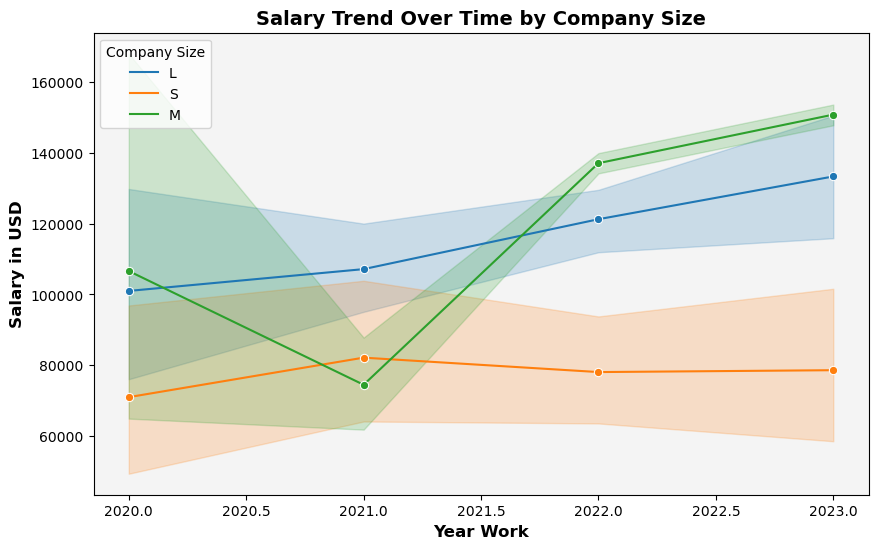

In [26]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work', fontsize=12, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold')

plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')
plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')

p.set_facecolor("#f4f4f4")

p.grid(False)
plt.show()

In [27]:
emp_salary = data.groupby('employment_type')['salary_in_usd'].mean()
emp_salary

employment_type
CT    113446.900000
FL     51807.800000
FT    138314.199570
PT     39533.705882
Name: salary_in_usd, dtype: float64

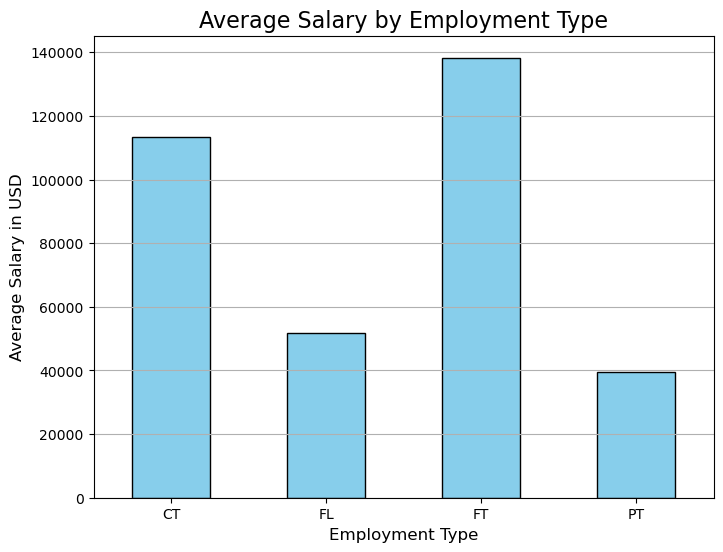

In [28]:
plt.figure(figsize=(8, 6))
emp_salary.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [29]:
emp_salary1 = data.groupby('salary_currency')['salary_in_usd'].mean()
emp_salary1

salary_currency
AUD     74198.444444
BRL     12448.000000
CAD     96707.400000
CHF    100682.000000
CLP     40038.000000
CZK      5132.000000
DKK     31192.666667
EUR     62281.733051
GBP     83850.229814
HKD     65062.000000
HUF     29892.666667
ILS    423834.000000
INR     25785.300000
JPY     60921.333333
MXN     33511.000000
PLN     34165.200000
SGD     81770.000000
THB     27096.500000
TRY     20096.666667
USD    149366.906638
Name: salary_in_usd, dtype: float64

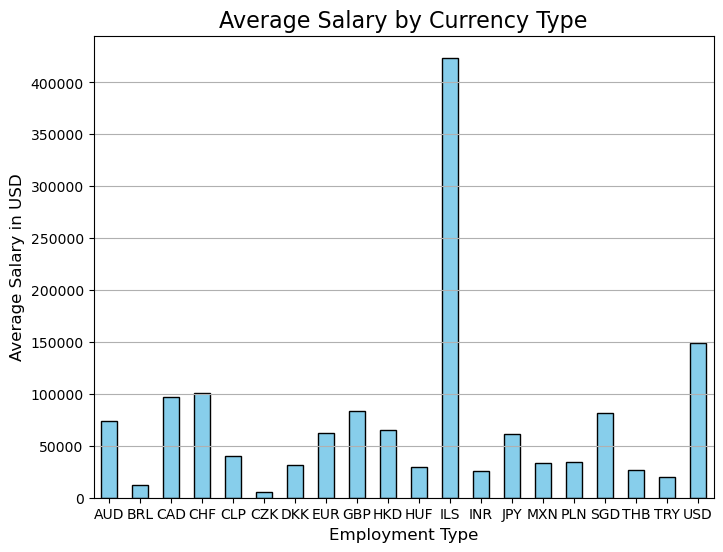

In [30]:
plt.figure(figsize=(8, 6))
emp_salary1.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Currency Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [31]:
emp_salary2 = data.groupby('experience_level')['salary_in_usd'].mean()
emp_salary2

experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64

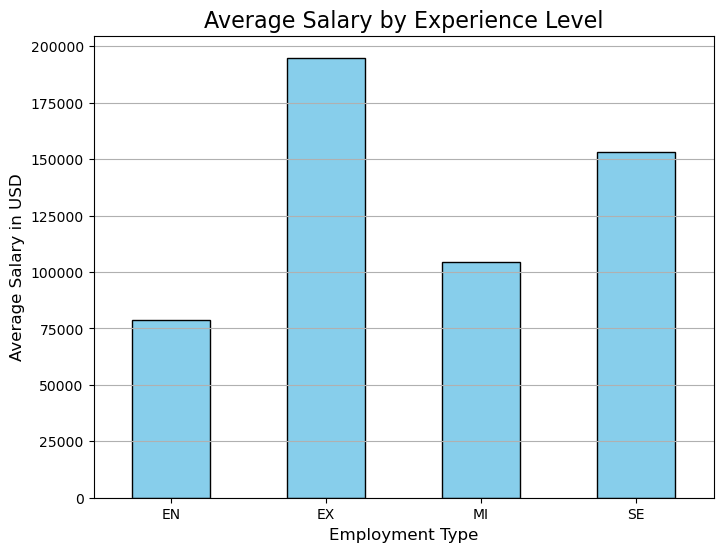

In [32]:
plt.figure(figsize=(8, 6))
emp_salary2.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Experience Level', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [33]:
emp_salary3 = data.groupby('remote_ratio')['salary_in_usd'].mean()
emp_salary3

remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: salary_in_usd, dtype: float64

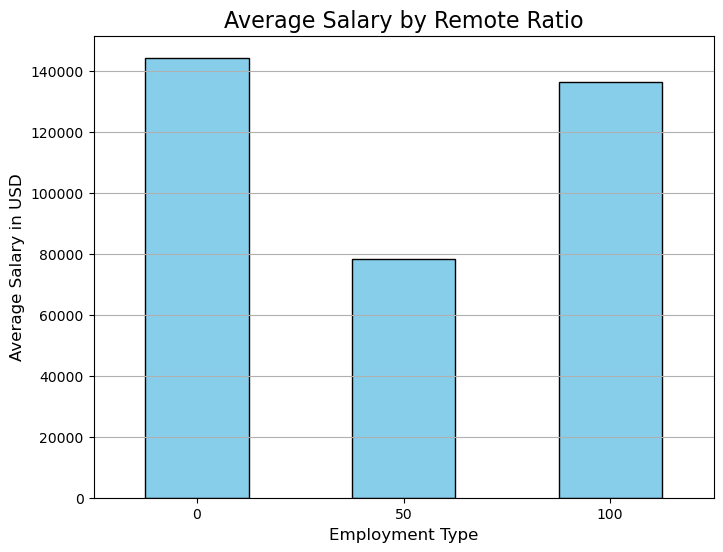

In [34]:
plt.figure(figsize=(8, 6))
emp_salary3.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Remote Ratio', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [35]:
emp_salary4 = data.groupby('company_size')['salary_in_usd'].mean()
emp_salary4

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

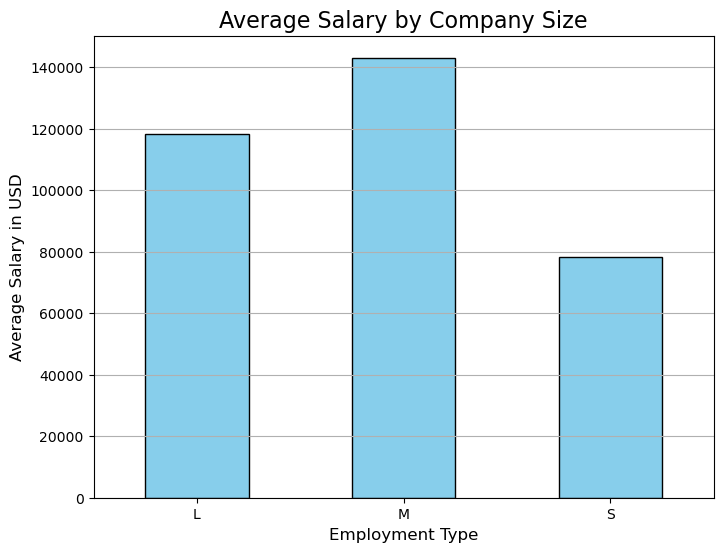

In [36]:
plt.figure(figsize=(8, 6))
emp_salary4.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Salary by Company Size', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)

plt.xticks(rotation=0)  
plt.grid(axis='y')  
plt.show()

In [37]:
emp_salary5 = data.groupby('company_location')['salary_in_usd'].mean()
emp_salary5

company_location
AE    100000.000000
AL     10000.000000
AM     50000.000000
AR     25000.000000
AS     29351.000000
          ...      
TH     23064.333333
TR     19058.000000
UA     57850.000000
US    151822.009539
VN     12000.000000
Name: salary_in_usd, Length: 72, dtype: float64

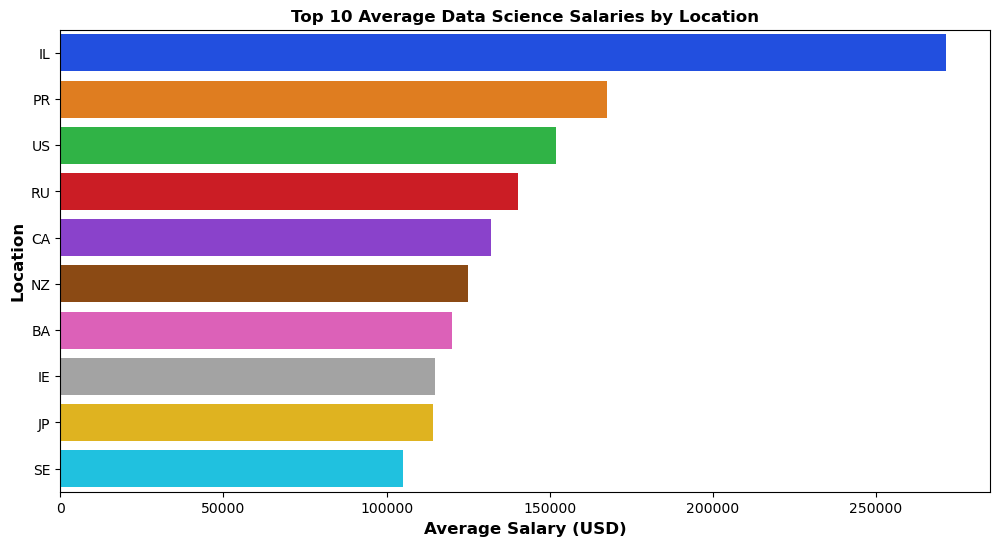

In [38]:
emp_salary5 = emp_salary5.sort_values(ascending=False)

emp_salary5_df = emp_salary5.reset_index()

top_n_locations = 10

plt.figure(figsize=(12, 6))
sns.barplot(x='salary_in_usd', y='company_location', data=emp_salary5_df.head(top_n_locations), palette='bright')

plt.title(f'Top {top_n_locations} Average Data Science Salaries by Location', fontsize=12, fontweight='bold')
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')

plt.show()


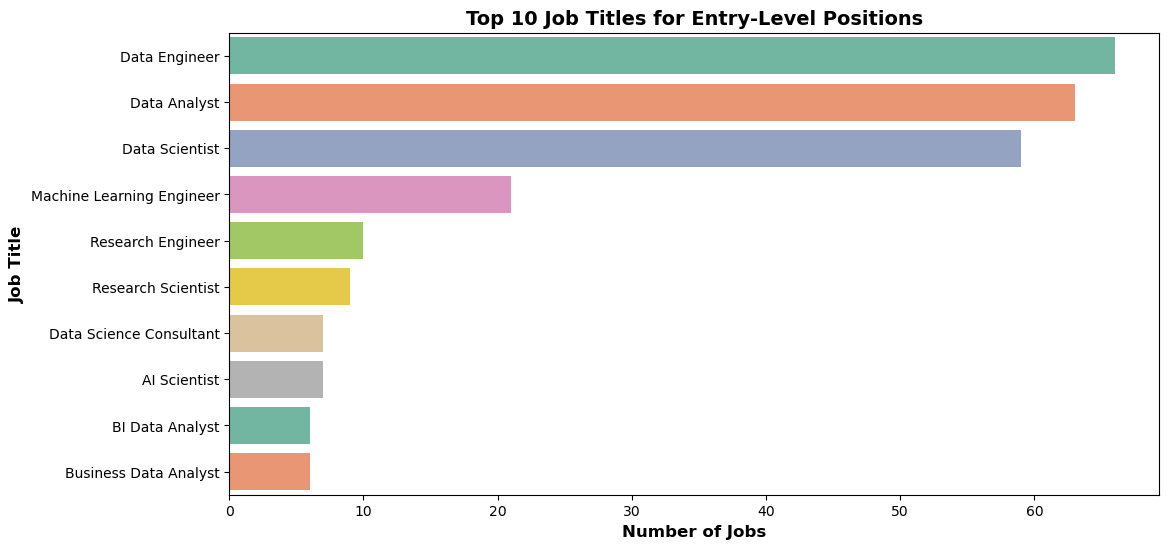

In [39]:
entry_level_jobs = data[data['experience_level'] == 'EN']

job_title_counts = entry_level_jobs['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='Set2')

plt.title('Top 10 Job Titles for Entry-Level Positions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

plt.show()

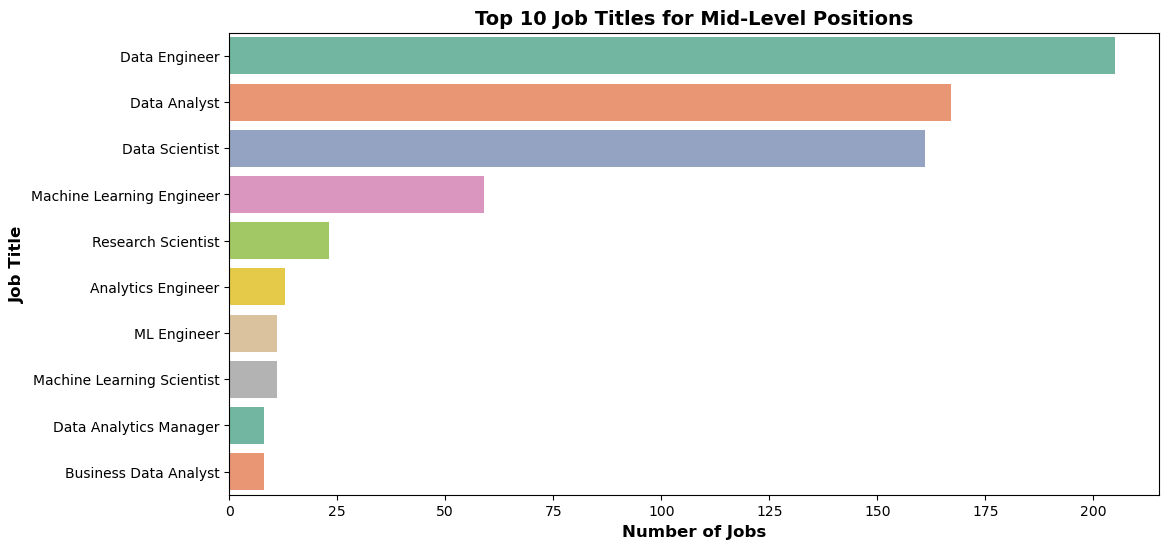

In [40]:
entry_level_jobs = data[data['experience_level'] == 'MI']

job_title_counts = entry_level_jobs['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='Set2')

plt.title('Top 10 Job Titles for Mid-Level Positions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

plt.show()

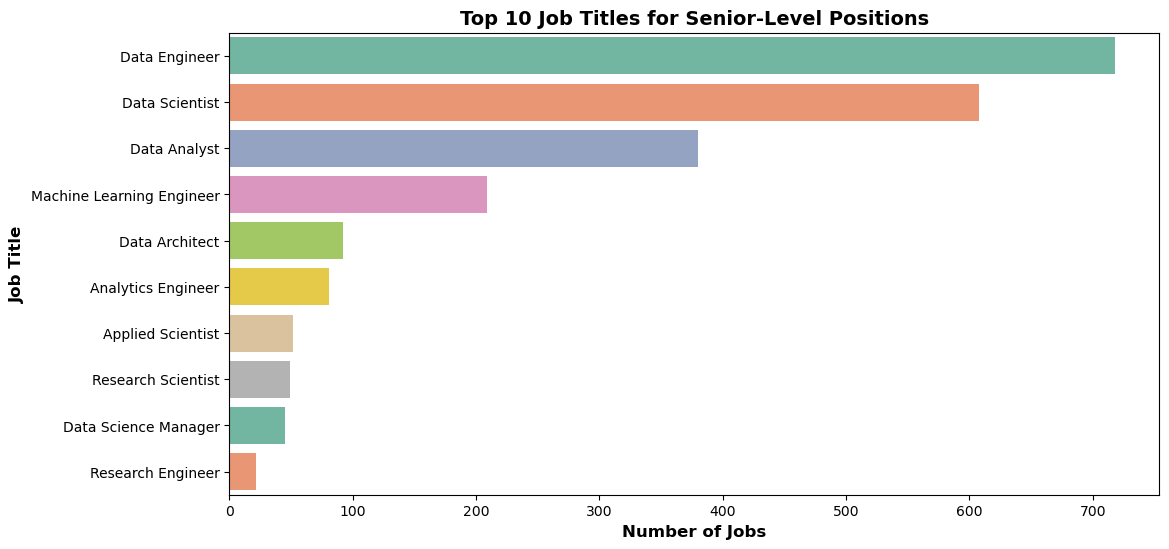

In [41]:
entry_level_jobs = data[data['experience_level'] == 'SE']

job_title_counts = entry_level_jobs['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='Set2')

plt.title('Top 10 Job Titles for Senior-Level Positions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

plt.show()

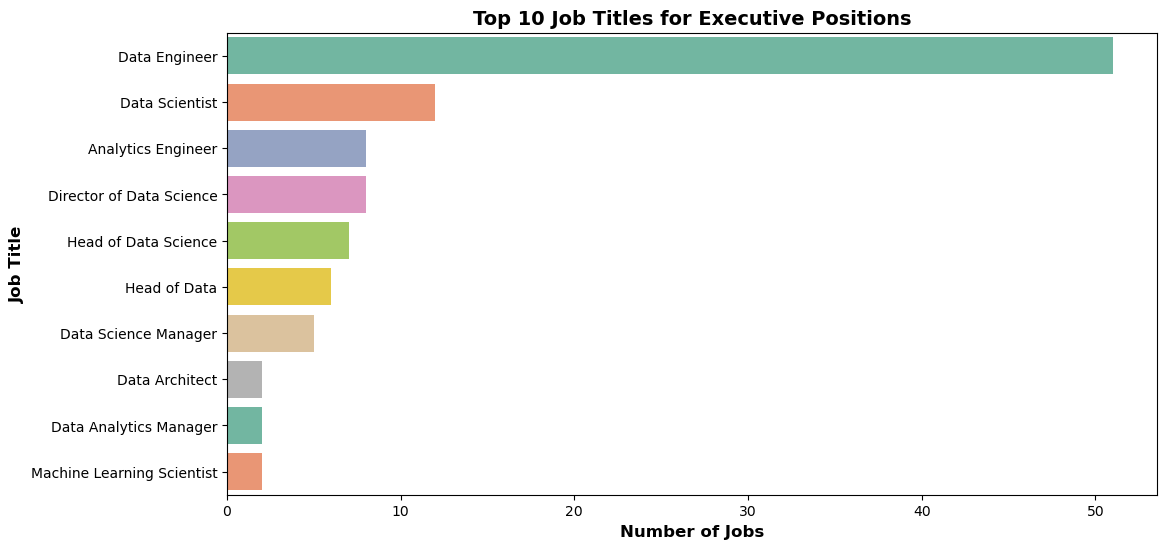

In [42]:
entry_level_jobs = data[data['experience_level'] == 'EX']

job_title_counts = entry_level_jobs['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='Set2')

plt.title('Top 10 Job Titles for Executive Positions', fontsize=14, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=12, fontweight='bold')
plt.ylabel('Job Title', fontsize=12, fontweight='bold')

plt.show()

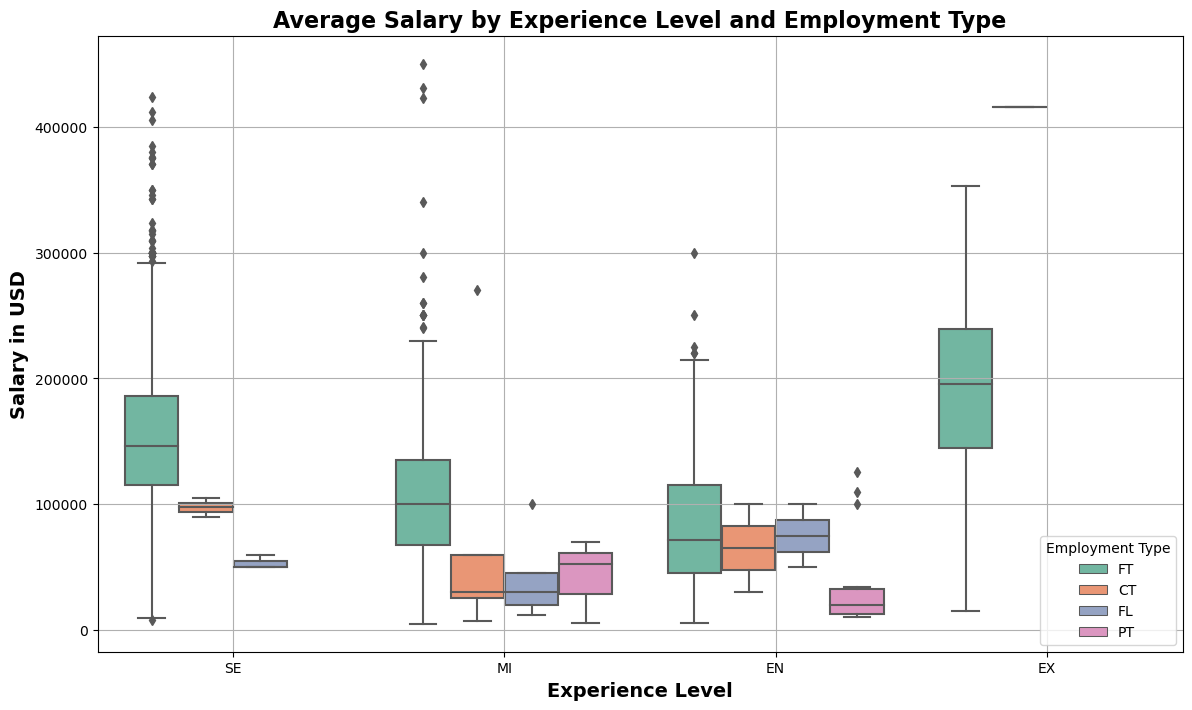

In [43]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=data, palette='Set2')

plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Salary in USD', fontsize=14, fontweight='bold')

plt.legend(title='Employment Type')
plt.grid(True)
plt.show()

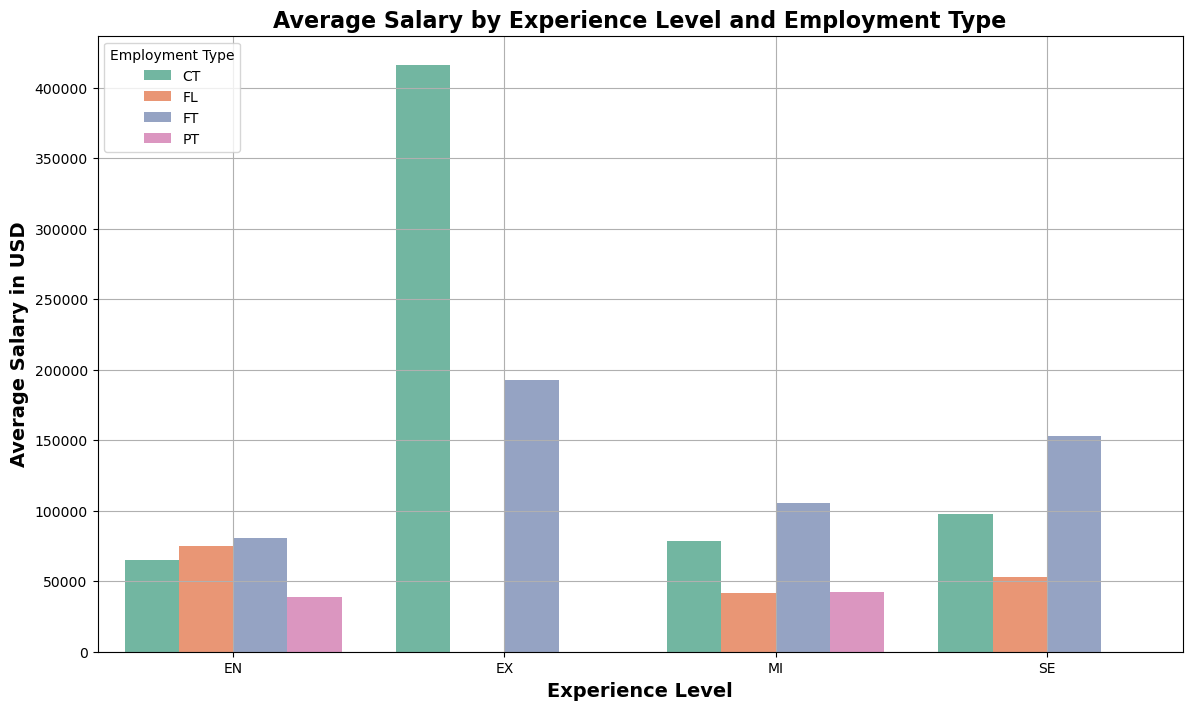

In [44]:
avg_salary = data.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=avg_salary, palette='Set2')

plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary in USD', fontsize=14, fontweight='bold')

plt.legend(title='Employment Type')
plt.grid(True)
plt.show()

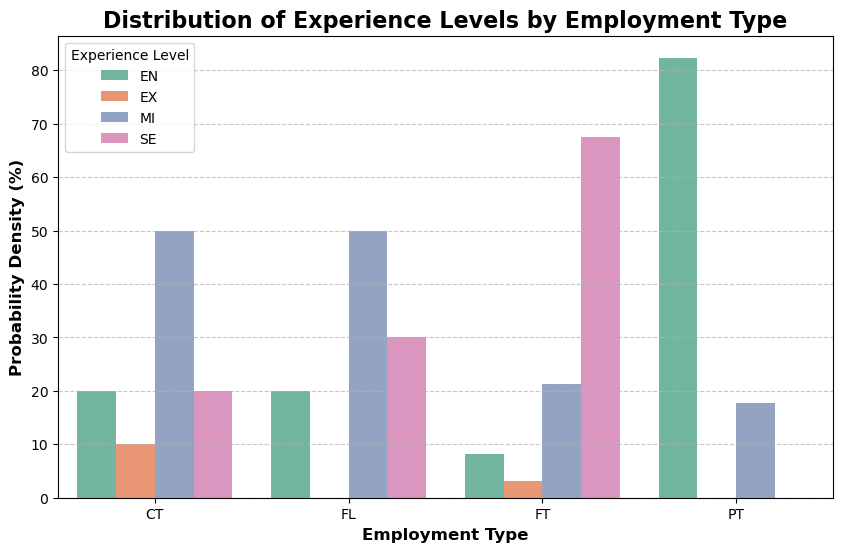

In [45]:
percentage_data = data.groupby(['employment_type', 'experience_level']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index(name='percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='percentage', hue='experience_level', data=percentage_data, palette='Set2')

plt.title('Distribution of Experience Levels by Employment Type', fontsize=16, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Probability Density (%)', fontsize=12, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Experience Level')
plt.show()

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.094724       0.228290     -0.236430
salary         -0.094724  1.000000      -0.023676      0.028731
salary_in_usd   0.228290 -0.023676       1.000000     -0.064171
remote_ratio   -0.236430  0.028731      -0.064171      1.000000


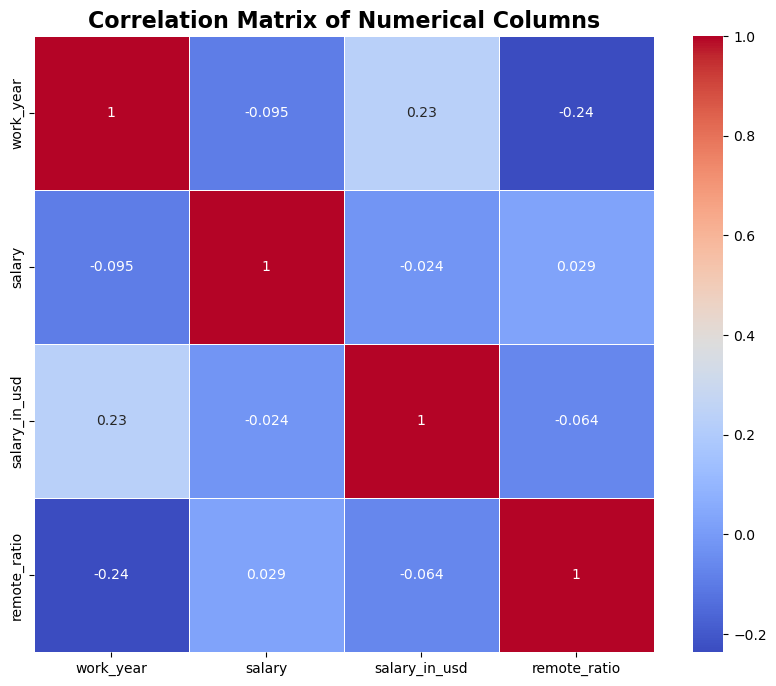

In [48]:
correlation_matrix = data.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix of Numerical Columns', fontsize=16, fontweight='bold')

plt.show()

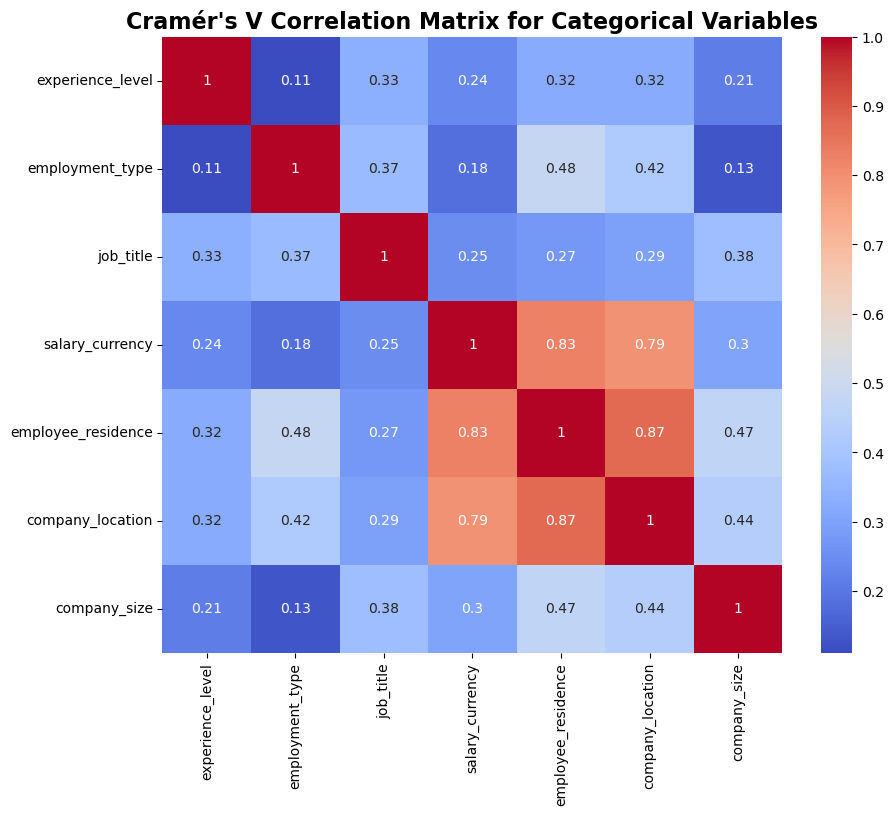

In [50]:
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0  
        else:
            confusion_matrix = pd.crosstab(data[col1], data[col2])
            cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm')

plt.title("Cramér's V Correlation Matrix for Categorical Variables", fontsize=16, fontweight='bold')
plt.show()

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X = data[numerical_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_columns

vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)

         feature       VIF
0      work_year  1.121639
1         salary  1.009101
2  salary_in_usd  1.055109
3   remote_ratio  1.059377
